# Loan Application Status Prediction

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# 7 features has null values.
# dropping loan_id col
df.drop(['Loan_ID'],axis=1,inplace=True)

In [13]:
df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mode().values[0])
df['Married'] = df['Married'].fillna(df['Married'].dropna().mode().values[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().mode().values[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mode().values[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode().values[0])


In [14]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Encoding Categorical column

In [15]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
ob = (df.dtypes=='object')
for i in list(ob[ob].index):
    df[i] = lab.fit_transform(df[i])

In [16]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [17]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [18]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [19]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


1.Here we can see the the difference between 75% and maximum value in some columns are high it means there outliers are present.
2.where mean is greater than median(50%) that column is skewed to left otherwise column skewed to right.


In [21]:
# checking the value counts for each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1    489
0    112
2     13
Name: Gender, dtype: int64


1    398
0    213
2      3
Name: Married, dtype: int64


0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64


0    480
1    134
Name: Education, dtype: int64


0    500
1     82
2     32
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.

(array([192.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 422.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

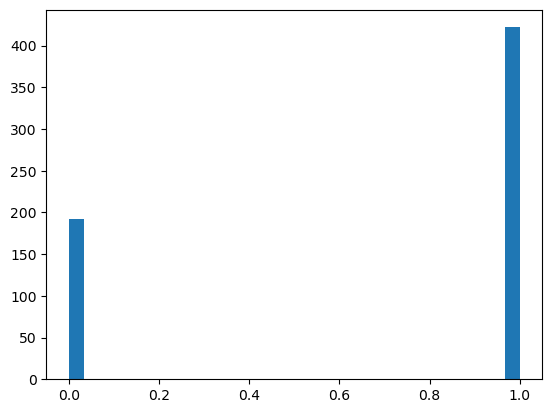

In [20]:
plt.hist(df['Loan_Status'],bins=30)

number of people approved loan status are high .
1 means people has status of loan approved.
0 means people has not status of loan approval.

<AxesSubplot:xlabel='Gender', ylabel='count'>

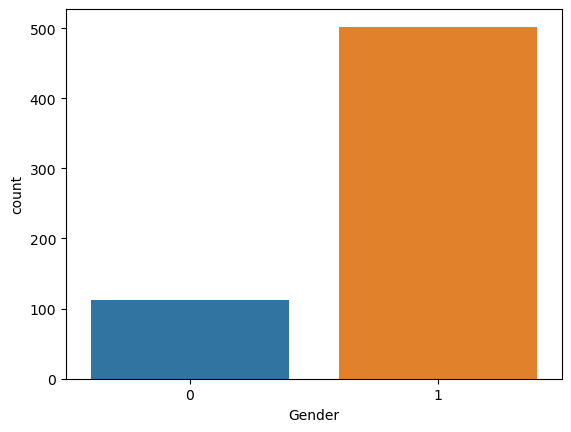

In [21]:
sns.countplot(x='Gender',data=df)

male = 1
female = 0
there are more men than women.

In [ ]:
 'Married', 'Dependents', 
'Education', 'Self_Employed','ApplicantIncome', 
'CoapplicantIncome', 'LoanAmount',
 'Loan_Amount_Term',
'Credit_History', 'Property_Area',
 'Loan_Status'],

<AxesSubplot:xlabel='Dependents', ylabel='count'>

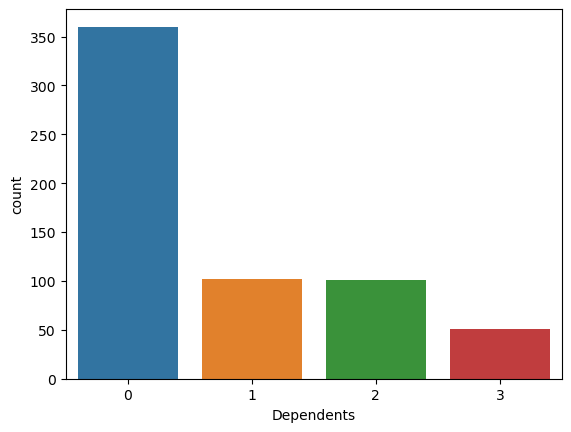

In [22]:
sns.countplot(x='Dependents',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

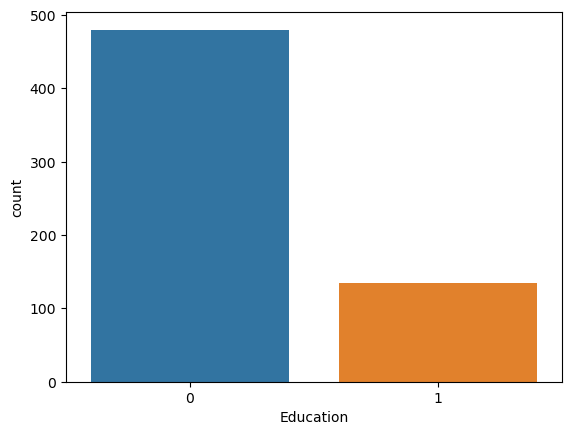

In [23]:
sns.countplot(x='Education',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

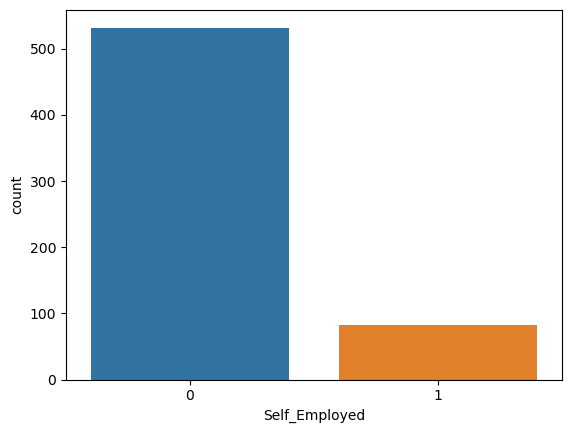

In [24]:
sns.countplot(x='Self_Employed',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

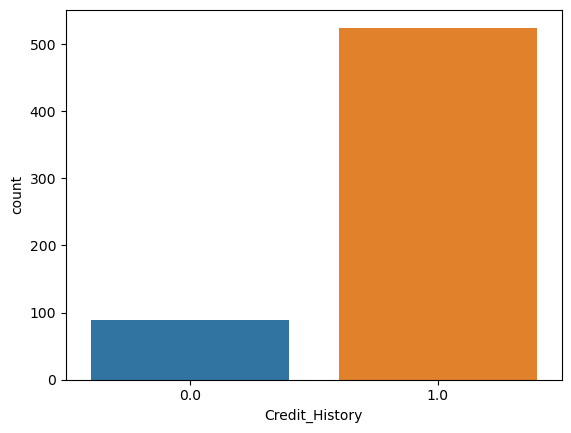

In [25]:
sns.countplot(x='Credit_History',data=df)

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>],
       [<AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>]], dtype=object)

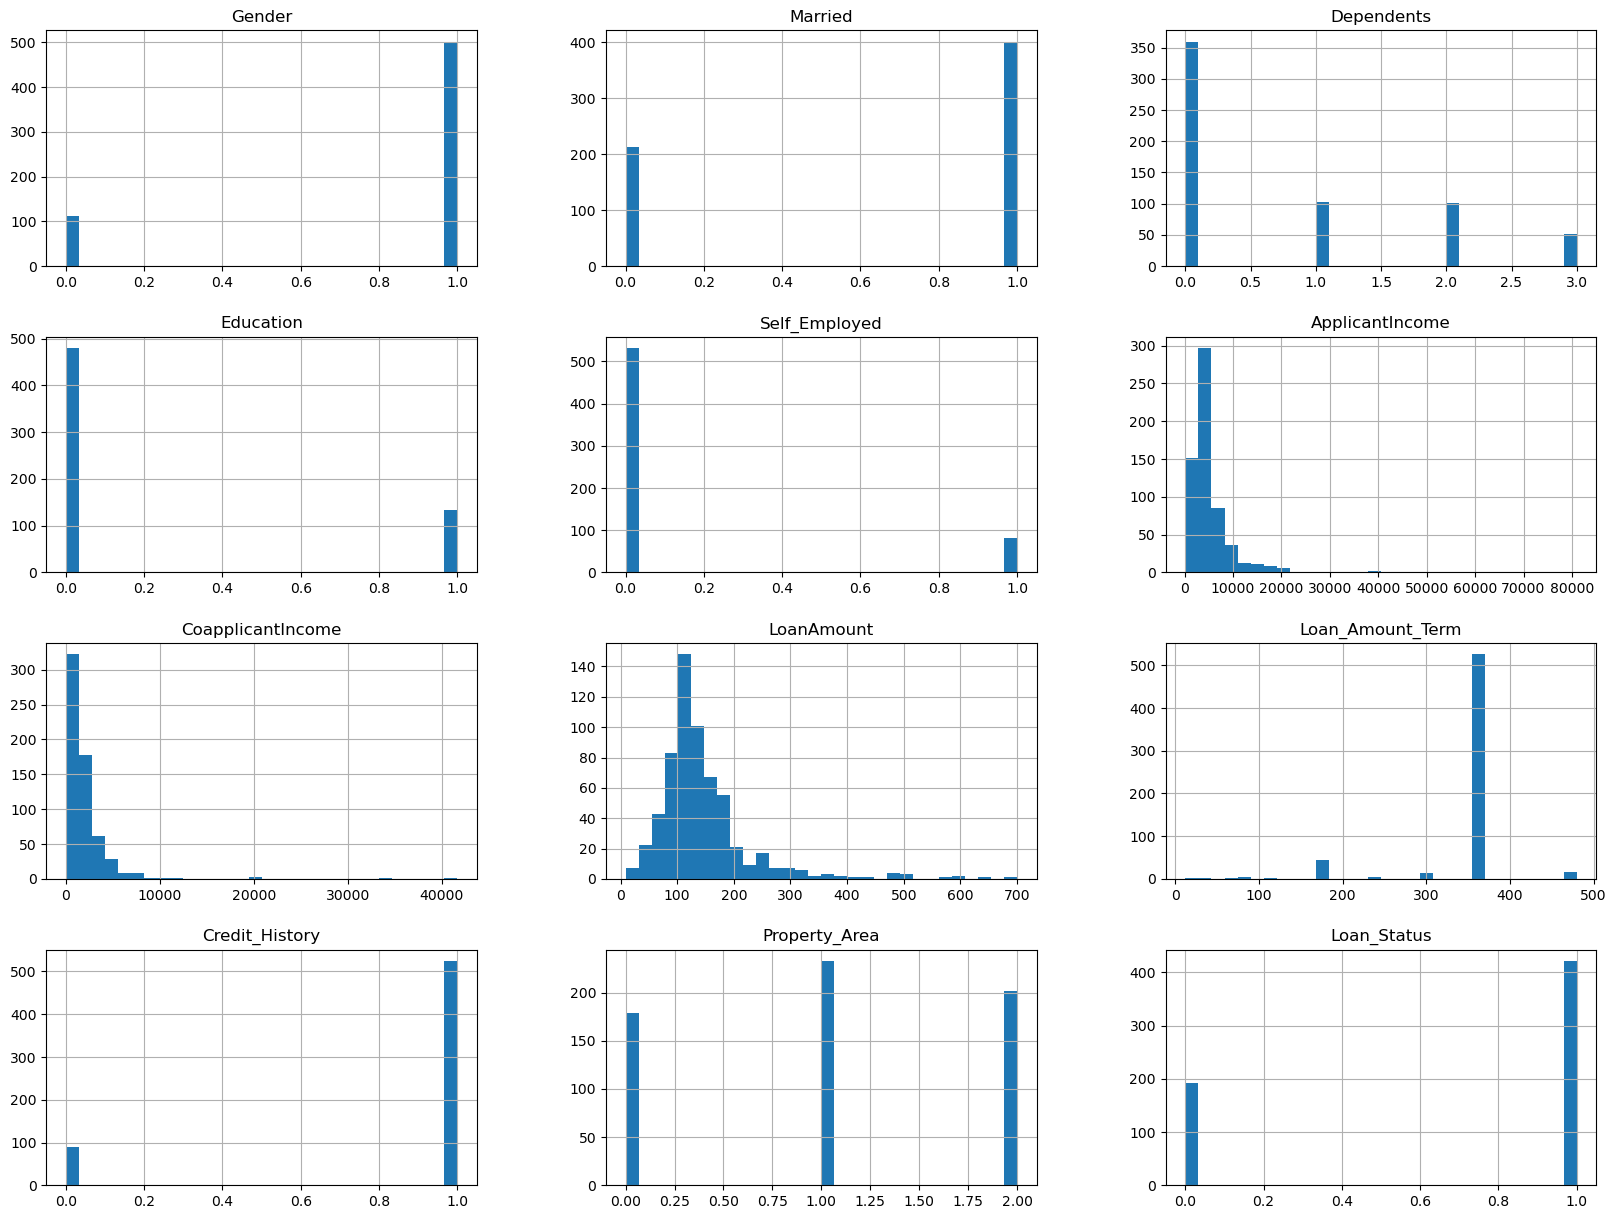

In [26]:
df.hist(figsize=(20,15),grid=True,bins=30)

# Distribution of all features of dataset

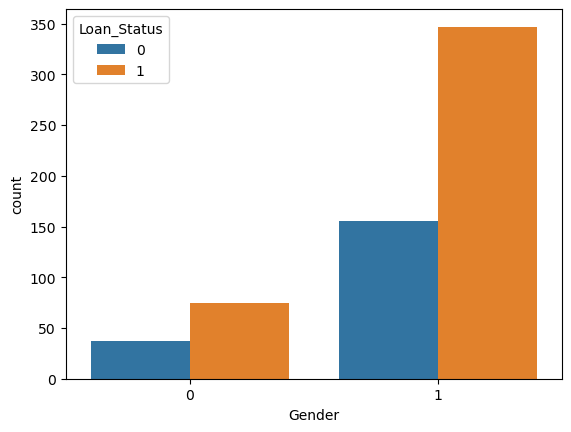

In [27]:
ax = sns.countplot(x='Gender',data=df,hue='Loan_Status')

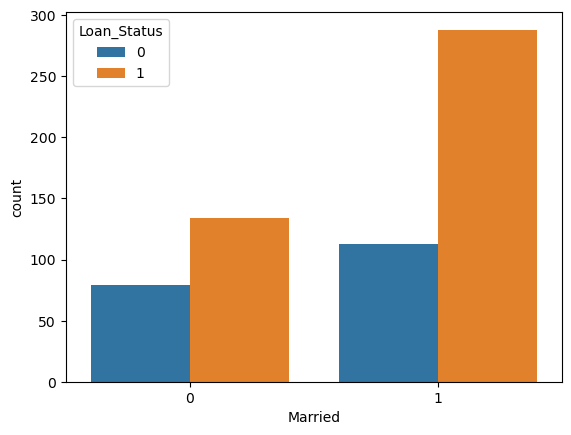

In [28]:
ax = sns.countplot(x='Married',data=df,hue='Loan_Status')

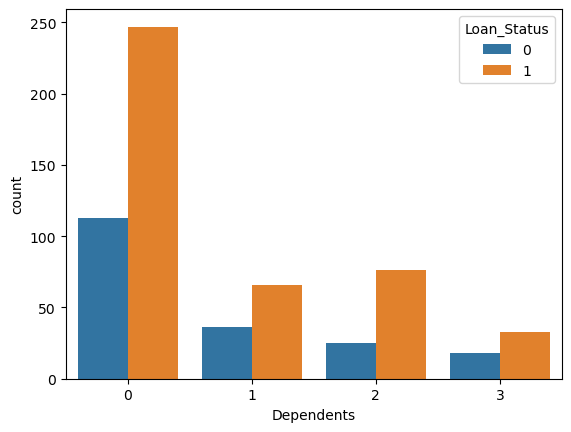

In [29]:
ax = sns.countplot(x='Dependents',data=df,hue='Loan_Status')

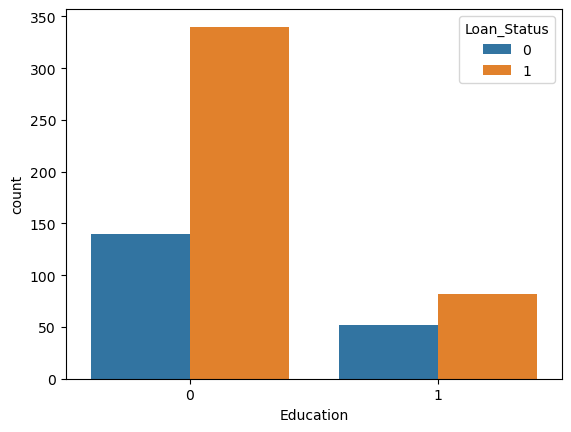

In [30]:
ax = sns.countplot(x='Education',data=df,hue='Loan_Status')

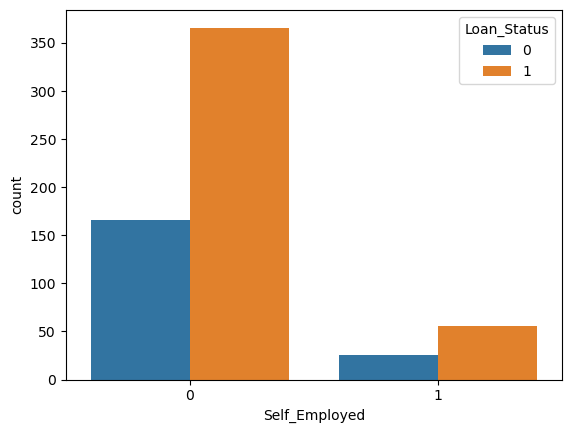

In [31]:
ax = sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')

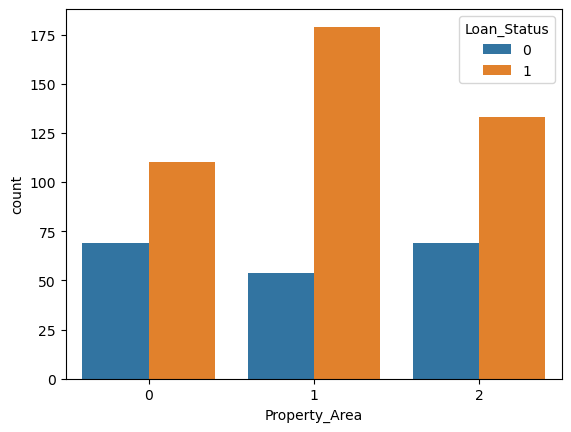

In [32]:
ax = sns.countplot(x='Property_Area',data=df,hue='Loan_Status')

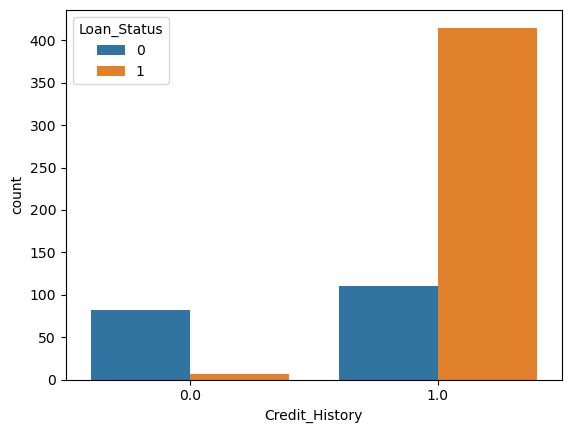

In [33]:
ax = sns.countplot(x='Credit_History',data=df,hue='Loan_Status')

In [34]:
print(set(df['Gender'].values.tolist()))

{0, 1}


1.more male applicant granted loans.
2.Married applicant are more likely to be granted loan.
3.majority of the population have zero dependants and also likely to accepted for loan.
4.graduate('0')population have higher proportion of loan approval.
5.most of population is not self emplyed.
6.more applicants from semi-urnban and also likely to be granted loans.
7.applicant with credit history are more likely to be accepted.


In [35]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [37]:
sk =('Dependents','Education','Self_Employed','ApplicantIncome',
     'LoanAmount','CoapplicantIncome')
for i in sk:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [38]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.671985
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.137460
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

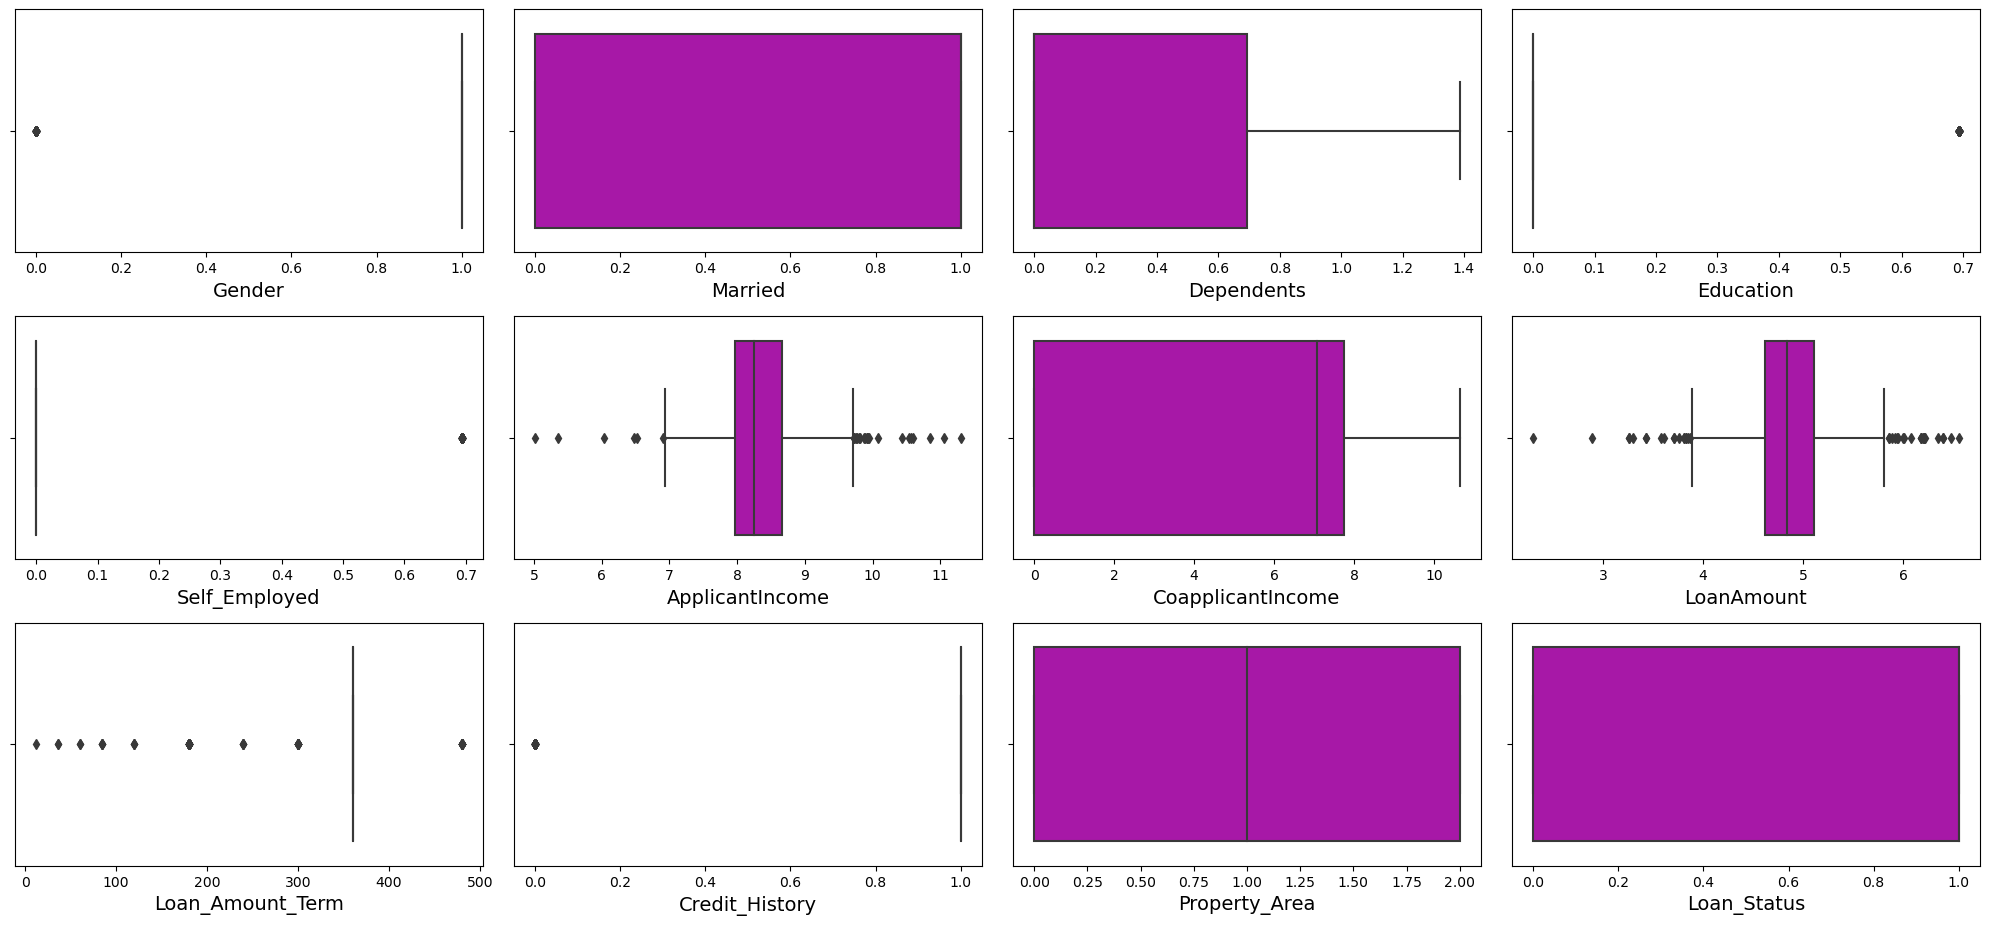

In [39]:
plt.figure(figsize=(20,15),facecolor='white')
plot = 1
for col in df.columns:
    if plot<=13:
        a = plt.subplot(5,4,plot)
        sns.boxplot(df[col],color='m')
        plt.xlabel(col,fontsize=14)
        plt.yticks(rotation=0,fontsize=10)
        plot+=1
plt.tight_layout()

In [40]:
from scipy.stats import zscore
zs = np.abs(zscore(df))


In [41]:
threshold=3
print(np.where(zs<3))
print(df.shape)

(array([  0,   0,   0, ..., 613, 613, 613], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(614, 12)


In [42]:
df_new = df[(zs<3).all(axis=1)]

In [43]:
df=df_new
print(df.shape)#after removing outliers

(587, 12)


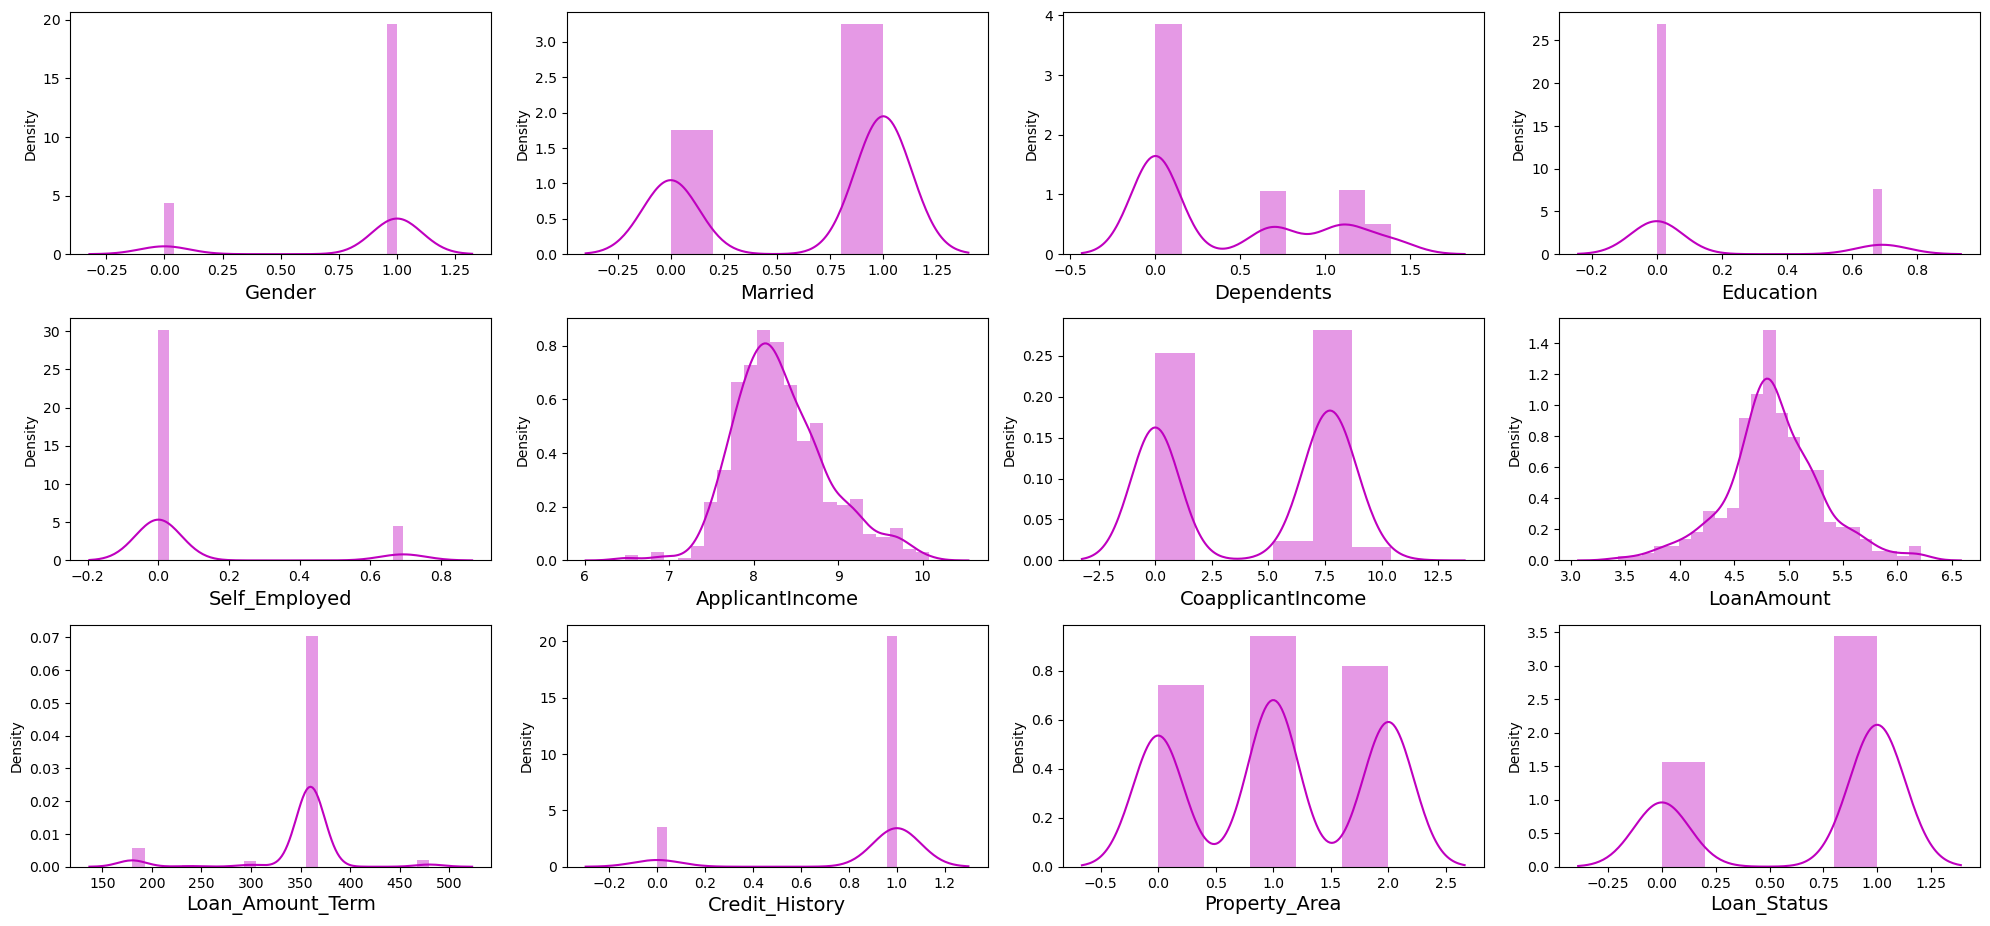

In [44]:
plt.figure(figsize=(20,15),facecolor='white')
plot = 1
for col in df.columns:
    if plot<=13:
        a = plt.subplot(5,4,plot)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=14)
        plt.yticks(rotation=0,fontsize=10)
        plot+=1
plt.tight_layout()

In [45]:
cor = df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.371416,0.190619,0.047731,-0.003641,0.049883,0.236224,0.160570,-0.102224,0.016074,-0.021046,0.009121
Married,0.371416,1.000000,0.352178,0.020657,-0.004878,0.001504,0.324897,0.191628,-0.125863,0.016260,0.014883,0.085557
Dependents,0.190619,0.352178,1.000000,0.055103,0.072697,0.122764,0.016402,0.150127,-0.091877,-0.023767,0.012991,0.007928
Education,0.047731,0.020657,0.055103,1.000000,-0.010160,-0.182252,0.049749,-0.145461,-0.093574,-0.077740,-0.067525,-0.092751
Self_Employed,-0.003641,-0.004878,0.072697,-0.010160,1.000000,0.193255,-0.078982,0.115775,-0.030284,-0.010510,-0.034281,-0.025269
ApplicantIncome,0.049883,0.001504,0.122764,-0.182252,0.193255,1.000000,-0.371874,0.494753,-0.057251,0.047730,-0.039505,-0.009139
CoapplicantIncome,0.236224,0.324897,0.016402,0.049749,-0.078982,-0.371874,1.000000,0.170191,0.004481,0.001844,-0.055184,0.066159
LoanAmount,0.160570,0.191628,0.150127,-0.145461,0.115775,0.494753,0.170191,1.000000,0.067779,0.003835,-0.101834,-0.034215
Loan_Amount_Term,-0.102224,-0.125863,-0.091877,-0.093574,-0.030284,-0.057251,0.004481,0.067779,1.000000,0.027747,-0.056662,-0.020837
Credit_History,0.016074,0.016260,-0.023767,-0.077740,-0.010510,0.047730,0.001844,0.003835,0.027747,1.000000,-0.008095,0.557678


1.values close to 1 indicate a strong positive linear relationship.
2.values close to -1 indicate a strong negative linear relationship.
3.values close to 0 indicate little to no linear relationship
4.There is an positive correlation  between applicationincome and coapplicantincome,coapplicantIncome and LoanAmount,LoanAmount and Loan_Amount_Term.It indicating that if one is increase then other one also increases.
5.There is negative correlation between education and applicantincome,married and credit history,education and loanamount,loan amount term and loan amount.

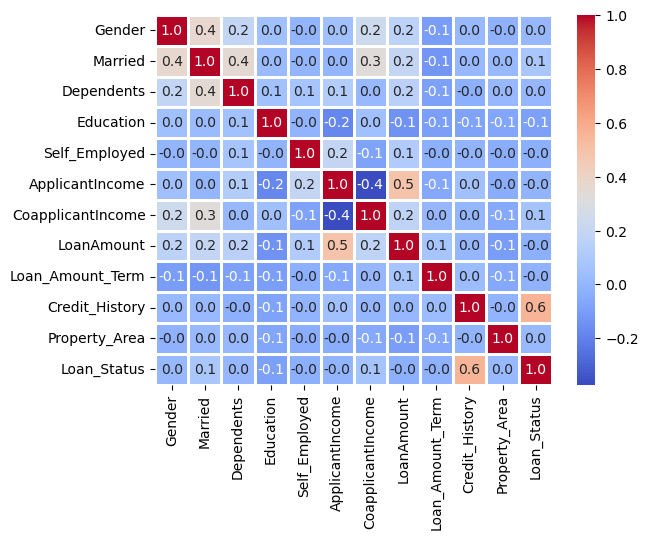

In [46]:
# visualizin correlation map
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.1f',linewidth=1)
plt.show()

In [89]:
# checking correlation of every features with target variable
cor['Loan_Status'].sort_values(ascending=
                              False)

Loan_Status          1.000000
Credit_History       0.557678
Married              0.085557
CoapplicantIncome    0.066159
Property_Area        0.016834
Gender               0.009121
Dependents           0.007928
ApplicantIncome     -0.009139
Loan_Amount_Term    -0.020837
Self_Employed       -0.025269
LoanAmount          -0.034215
Education           -0.092751
Name: Loan_Status, dtype: float64

# Seperating Feature and Label

In [48]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

# Feature Scaling using Standard Scalarization

In [51]:
from sklearn.preprocessing import StandardScaler

In [50]:
scale = StandardScaler()
ax = pd.DataFrame(scale.fit_transform(x),columns = x.columns)

# Checking Variance Inflation Factor(VIF)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,6.710889,Gender
1,4.070135,Married
2,1.908344,Dependents
3,1.292348,Education
4,1.183659,Self_Employed
5,218.289513,ApplicantIncome
6,3.278860,CoapplicantIncome
7,212.544816,LoanAmount
8,41.560617,Loan_Amount_Term
9,6.783257,Credit_History


In [54]:
x.drop('ApplicantIncome',axis = 1,inplace=True)

In [55]:
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,6.627816,Gender
1,4.069923,Married
2,1.908143,Dependents
3,1.283413,Education
4,1.180549,Self_Employed
5,2.662600,CoapplicantIncome
6,51.140486,LoanAmount
7,38.595246,Loan_Amount_Term
8,6.592456,Credit_History
9,2.640516,Property_Area


In [56]:
y.value_counts()

1    404
0    183
Name: Loan_Status, dtype: int64

Here we can see that the data is not balanced,since it is a classification problem .we will balance the data using oversampling mathod

# Oversampling

In [57]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [58]:
print(y.value_counts())
print(y1.value_counts())

1    404
0    183
Name: Loan_Status, dtype: int64
1    404
0    404
Name: Loan_Status, dtype: int64


# Modelling

In [77]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve

In [63]:
maxacc = 0
maxrs = 0
for i in range(30,60):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size =0.30,random_state=i )
    rfr = RandomForestClassifier()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('best accuracy is:',maxacc,'at random state:',maxrs)

best accuracy is: 0.8518518518518519 at random state: 40


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30,random_state=maxrs )

In [65]:
y_train

486    0
276    1
514    0
590    1
598    1
      ..
457    0
172    0
7      0
229    1
340    0
Name: Loan_Status, Length: 410, dtype: int32

# Classification Algorithm

In [66]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8361581920903954
[[ 31  17]
 [ 12 117]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        48
           1       0.87      0.91      0.89       129

    accuracy                           0.84       177
   macro avg       0.80      0.78      0.79       177
weighted avg       0.83      0.84      0.83       177



In [68]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8700564971751412
[[ 26  22]
 [  1 128]]
              precision    recall  f1-score   support

           0       0.96      0.54      0.69        48
           1       0.85      0.99      0.92       129

    accuracy                           0.87       177
   macro avg       0.91      0.77      0.81       177
weighted avg       0.88      0.87      0.86       177



In [69]:
sv = SVC()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.7288135593220338
[[  0  48]
 [  0 129]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.73      1.00      0.84       129

    accuracy                           0.73       177
   macro avg       0.36      0.50      0.42       177
weighted avg       0.53      0.73      0.61       177



In [70]:
gr = GradientBoostingClassifier()
gr.fit(x_train,y_train)
predgr = rfc.predict(x_test)
print(accuracy_score(y_test,predgr))
print(confusion_matrix(y_test,predgr))
print(classification_report(y_test,predgr))

0.8361581920903954
[[ 31  17]
 [ 12 117]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        48
           1       0.87      0.91      0.89       129

    accuracy                           0.84       177
   macro avg       0.80      0.78      0.79       177
weighted avg       0.83      0.84      0.83       177



In [71]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
predet = et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

0.7909604519774012
[[ 30  18]
 [ 19 110]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.62        48
           1       0.86      0.85      0.86       129

    accuracy                           0.79       177
   macro avg       0.74      0.74      0.74       177
weighted avg       0.79      0.79      0.79       177



# Cross validation Score

In [73]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print('diffrence:',accuracy_score(y_test,predrfc)-score.mean())

[0.77966102 0.77118644 0.79487179 0.76923077 0.76068376]
0.7751267564826887
diffrence: 0.06103143560770674


In [75]:
score = cross_val_score(lr,x,y)
print(score)
print(score.mean())
print('diffrence:',accuracy_score(y_test,predlr)-score.mean())

[0.80508475 0.79661017 0.78632479 0.86324786 0.82905983]
0.8160654787773431
diffrence: 0.053991018397798074


In [74]:
score = cross_val_score(gr,x,y)
print(score)
print(score.mean())
print('diffrence:',accuracy_score(y_test,predgr)-score.mean())

[0.77966102 0.75423729 0.78632479 0.82905983 0.8034188 ]
0.7905403447776329
diffrence: 0.04561784731276253


In [76]:
score = cross_val_score(et,x,y)
print(score)
print(score.mean())
print('diffrence:',accuracy_score(y_test,predet)-score.mean())

[0.77118644 0.76271186 0.76923077 0.76068376 0.73504274]
0.7597711140084021
diffrence: 0.03118933796899903


Extra tree classifier is our best model as the difference between accurancy score and cross validation score is least.

# Hyper Parameter Tuning

In [78]:
param = {'criterion':['gini','entropy'],
        'random_state':[10,50,100],
        'max_depth':[0,10,20],
        'n_jobs':[-2,-1,1],
        'n_estimators':[50,100,200,300]}

In [79]:
gcv = GridSearchCV(ExtraTreesClassifier(),param,cv=5)

In [80]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [81]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [83]:
final_model = ExtraTreesClassifier(criterion = 'entropy',max_depth = 10,
                                  n_estimators = 200,n_jobs=-2,random_state=50)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

85.31073446327684


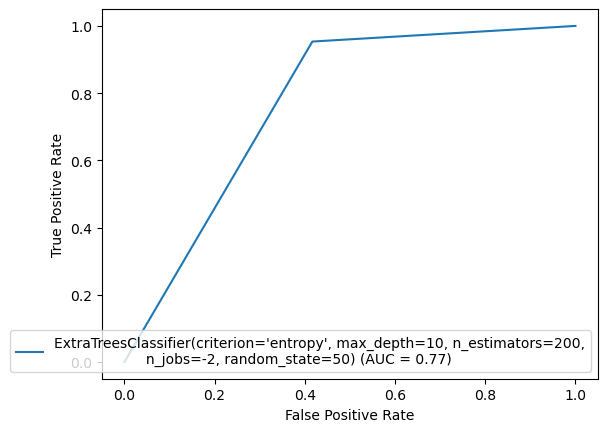

In [84]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,
                                 estimator_name=final_model)
display.plot()

here we have plotted ROC curve for the final model and the AUC value for the best model is 70%.

# Saving the model

In [85]:
import joblib
joblib.dump(final_model,'Loan_Applicant.pkl')

['Loan_Applicant.pkl']

In [86]:
model = joblib.load('Loan_Applicant.pkl')
pred = model.predict(x_test)
pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [87]:
a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = pred
df1['Original'] = a

In [88]:
df1

,Predicted,Original
0,1,1
1,0,0
2,1,1
3,1,0
4,1,1
...,...,...
172,1,1
173,1,1
174,1,0
175,1,1


==============================================================================================================================